# PEP 558 - Homework #6

## Problem 1

## Circuit Input: |01>

### QISKIT Code

In [1]:
#QISKIT
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_xc = ClassicalRegister(1, 'xc')
creg_zc = ClassicalRegister(1, 'zc')
creg_c0 = ClassicalRegister(1, 'c0')
circuit = QuantumCircuit(qreg_q, creg_xc, creg_zc, creg_c0)

circuit.x(qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.measure(qreg_q[0], creg_zc[0])
circuit.measure(qreg_q[1], creg_xc[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

circuit.x(qreg_q[2]).c_if(creg_xc, 1)
circuit.z(qreg_q[2]).c_if(creg_zc, 1)

circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.measure(qreg_q[2], creg_c0[0])

In [2]:
circuit.draw()

░                ┌───┐ ░ ┌─┐    ░                ░    
 q_0: ──────░─────────────■──┤ H ├─░─┤M├────░────────────────░────
            ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░                ░    
 q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░────────────────░────
      ┌───┐ ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░  ┌───┐  ┌───┐  ░ ┌─┐
 q_2: ┤ X ├─░──────┤ X ├───────────░──╫──╫──░──┤ X ├──┤ Z ├──░─┤M├
      └───┘ ░      └───┘           ░  ║  ║  ░  └─╥─┘  └─╥─┘  ░ └╥┘
                                      ║  ║    ┌──╨──┐   ║       ║ 
xc: 1/════════════════════════════════╬══╩════╡ 0x1 ╞═══╬═══════╬═
                                      ║  0    └─────┘┌──╨──┐    ║ 
zc: 1/════════════════════════════════╩══════════════╡ 0x1 ╞════╬═
                                      0              └─────┘    ║ 
c0: 1/══════════════════════════════════════════════════════════╩═
                                                                0

### IBM Quantum Composer output:

|110>

### AER Simulator

In [3]:
# As we can see, the circuit is now built according to the image. We can now measure the qubit at the quantum register.
# For this we have two methods, AER(quantum computer simulator) and IBMQ (IBM's quantum computer)

#AER
from qiskit.providers.aer import QasmSimulator
backend= QasmSimulator()
job = backend.run(circuit,shots=1024)
result = job.result()
print(result)





Result(backend_name='qasm_simulator', backend_version='0.11.2', qobj_id='9186bce7-7a66-4191-89e4-439b03a91190', job_id='f6b46994-5031-48a8-945a-2b5df417eced', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x7': 245, '0x4': 264, '0x5': 256, '0x6': 259}), header=QobjExperimentHeader(clbit_labels=[['xc', 0], ['zc', 0], ['c0', 0]], creg_sizes=[['xc', 1], ['zc', 1], ['c0', 1]], global_phase=0.0, memory_slots=3, metadata={}, n_qubits=3, name='circuit-85', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, seed_simulator=4186732001, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'parallel_state_update': 1, 'parallel_shots': 8, 'device': 'CPU', 'active_input_qubits': [0, 1, 2], 'measure_sampling': False, 'num_clbits': 3, 'input_qubit_map': [[2, 2], [1, 1], [0, 0]], 'num_qubits': 3, 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.009

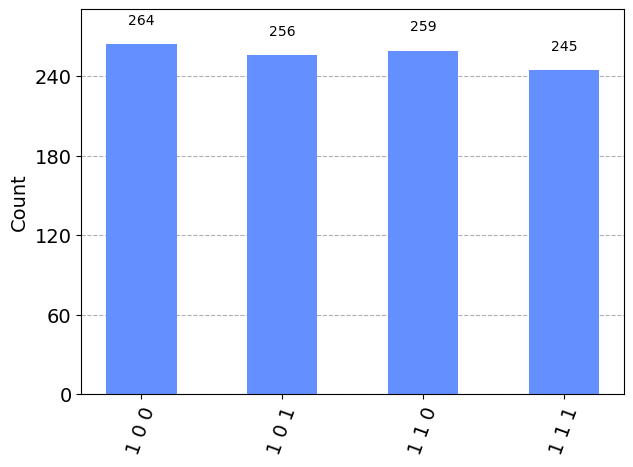

In [4]:
# We can plot a histogram to see the values
from qiskit.visualization import plot_histogram
counts = result.get_counts(circuit)
plot_histogram(counts)


In [5]:
# Let us see the counts
print(counts)


{'1 1 1': 245, '1 0 0': 264, '1 0 1': 256, '1 1 0': 259}


### IBMQ

In [ ]:
#IBMQ

# Now let us see the working of this circuit on a real quantum machine.
# Note: You need to create an IBMQ account before proceeding.
from qiskit import *
from qiskit import IBMQ

# This step is for first time users.
# 'IBMQ.save_account(TOKEN)'
# For this token, visit https://quantum-computing.ibm.com/ create an account with any email id
# and login to view the token and copy it.

# This step is after you have created and saved your account.
IBMQ.load_account()

# To view all the poviders
print([backend.name() for backend in IBMQ.providers()[0].backends()])




# We can select any provider, but ibmq_manila will work.
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub = 'ibm-q',group = 'open',project='main')
backend = provider.get_backend('ibmq_lima')
job = execute(circuit, backend=backend, shots=100)
job_monitor(job)
results = job.result()


In [ ]:
# Plot histogram of the outputs recieved.
counts = results.get_counts(circuit)
plot_histogram(counts)

## Circuit Input: |10>

### QISKIT Code

In [6]:
#QISKIT
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_xc = ClassicalRegister(1, 'xc')
creg_zc = ClassicalRegister(1, 'zc')
creg_c0 = ClassicalRegister(1, 'c0')
circuit = QuantumCircuit(qreg_q, creg_xc, creg_zc, creg_c0)

circuit.x(qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.measure(qreg_q[0], creg_zc[0])
circuit.measure(qreg_q[1], creg_xc[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.x(qreg_q[2]).c_if(creg_xc, 1)
circuit.z(qreg_q[2]).c_if(creg_zc, 1)
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.measure(qreg_q[2], creg_c0[0])

In [7]:
# remember to convert circuit -> quantum_circuit

In [8]:
circuit.draw()

░                ┌───┐ ░ ┌─┐    ░                ░    
 q_0: ──────░─────────────■──┤ H ├─░─┤M├────░────────────────░────
      ┌───┐ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░                ░    
 q_1: ┤ X ├─░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░────────────────░────
      └───┘ ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░  ┌───┐  ┌───┐  ░ ┌─┐
 q_2: ──────░──────┤ X ├───────────░──╫──╫──░──┤ X ├──┤ Z ├──░─┤M├
            ░      └───┘           ░  ║  ║  ░  └─╥─┘  └─╥─┘  ░ └╥┘
                                      ║  ║    ┌──╨──┐   ║       ║ 
xc: 1/════════════════════════════════╬══╩════╡ 0x1 ╞═══╬═══════╬═
                                      ║  0    └─────┘┌──╨──┐    ║ 
zc: 1/════════════════════════════════╩══════════════╡ 0x1 ╞════╬═
                                      0              └─────┘    ║ 
c0: 1/══════════════════════════════════════════════════════════╩═
                                                                0

### IBM Quantum Composer output:

|010>

### Aer Simulator

In [9]:
# As we can see, the circuit is now built according to the image. We can now measure the qubit at the quantum register.
# For this we have two methods, AER(quantum computer simulator) and IBMQ (IBM's quantum computer)

#AER
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
job = backend.run(circuit,shots=1024)
result = job.result()
print(result)





Result(backend_name='qasm_simulator', backend_version='0.11.2', qobj_id='02b976c2-364e-418d-a5a5-0a71f71f6c37', job_id='65856721-0c26-427a-89e9-8676f076a3f3', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 274, '0x2': 267, '0x3': 251, '0x0': 232}), header=QobjExperimentHeader(clbit_labels=[['xc', 0], ['zc', 0], ['c0', 0]], creg_sizes=[['xc', 1], ['zc', 1], ['c0', 1]], global_phase=0.0, memory_slots=3, metadata={}, n_qubits=3, name='circuit-89', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, seed_simulator=376310127, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'parallel_state_update': 1, 'parallel_shots': 8, 'device': 'CPU', 'active_input_qubits': [0, 1, 2], 'measure_sampling': False, 'num_clbits': 3, 'input_qubit_map': [[2, 2], [1, 1], [0, 0]], 'num_qubits': 3, 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.0400

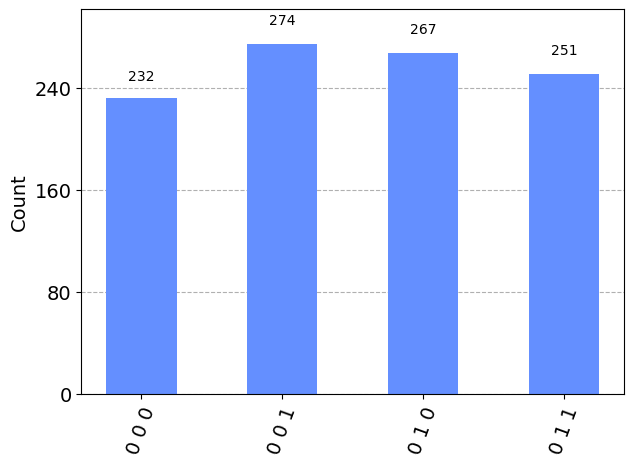

In [10]:
# We can plot a histogram to see the values
from qiskit.visualization import plot_histogram
counts = result.get_counts(circuit)
plot_histogram(counts)


In [11]:
# Let us see the counts
print(counts)


{'0 0 1': 274, '0 1 0': 267, '0 1 1': 251, '0 0 0': 232}


### IBMQ

In [ ]:
#IBMQ

# Now let us see the working of this circuit on a real quantum machine.
# Note: You need to create an IBMQ account before proceeding.
from qiskit import *
from qiskit import IBMQ

# This step is for first time users.
# 'IBMQ.save_account(TOKEN)'
# For this token, visit https://quantum-computing.ibm.com/ create an account with any email id
# and login to view the token and copy it.

# This step is after you have created and saved your account.
IBMQ.load_account()

# To view all the poviders
print([backend.name() for backend in IBMQ.providers()[0].backends()])




# We can select any provider, but ibmq_manila will work.
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub = 'ibm-q',group = 'open',project='main')
backend = provider.get_backend('ibmq_lima')
job = execute(circuit, backend=backend, shots=100)
job_monitor(job)
results = job.result()






In [ ]:
# Plot histogram of the outputs recieved.
counts = results.get_counts(circuit)
plot_histogram(counts)

## Circuit Input: |11>

### QISKIT Code

In [12]:
#QISKIT
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_xc = ClassicalRegister(1, 'xc')
creg_zc = ClassicalRegister(1, 'zc')
creg_c0 = ClassicalRegister(1, 'c0')
circuit = QuantumCircuit(qreg_q, creg_xc, creg_zc, creg_c0)

circuit.x(qreg_q[2])
circuit.x(qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.measure(qreg_q[0], creg_zc[0])
circuit.measure(qreg_q[1], creg_xc[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.x(qreg_q[2]).c_if(creg_xc, 1)
circuit.z(qreg_q[2]).c_if(creg_zc, 1)
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.measure(qreg_q[2], creg_c0[0])

In [ ]:
# remember to convert circuit -> quantum_circuit

In [13]:
circuit.draw()

░                ┌───┐ ░ ┌─┐    ░                ░    
 q_0: ──────░─────────────■──┤ H ├─░─┤M├────░────────────────░────
      ┌───┐ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░                ░    
 q_1: ┤ X ├─░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░────────────────░────
      ├───┤ ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░  ┌───┐  ┌───┐  ░ ┌─┐
 q_2: ┤ X ├─░──────┤ X ├───────────░──╫──╫──░──┤ X ├──┤ Z ├──░─┤M├
      └───┘ ░      └───┘           ░  ║  ║  ░  └─╥─┘  └─╥─┘  ░ └╥┘
                                      ║  ║    ┌──╨──┐   ║       ║ 
xc: 1/════════════════════════════════╬══╩════╡ 0x1 ╞═══╬═══════╬═
                                      ║  0    └─────┘┌──╨──┐    ║ 
zc: 1/════════════════════════════════╩══════════════╡ 0x1 ╞════╬═
                                      0              └─────┘    ║ 
c0: 1/══════════════════════════════════════════════════════════╩═
                                                                0

### IBM Quantum Composer output:

|110>

### Aer Simulator

In [14]:
# As we can see, the circuit is now built according to the image. We can now measure the qubit at the quantum register.
# For this we have two methods, AER(quantum computer simulator) and IBMQ (IBM's quantum computer)

#AER
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
job = backend.run(circuit,shots=1024)
result = job.result()
print(result)





Result(backend_name='qasm_simulator', backend_version='0.11.2', qobj_id='3dfb4cbf-5f08-4c41-98a2-ae400418f924', job_id='97d1f828-2ac9-40fa-8667-8b5de82c962e', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x7': 263, '0x4': 283, '0x6': 243, '0x5': 235}), header=QobjExperimentHeader(clbit_labels=[['xc', 0], ['zc', 0], ['c0', 0]], creg_sizes=[['xc', 1], ['zc', 1], ['c0', 1]], global_phase=0.0, memory_slots=3, metadata={}, n_qubits=3, name='circuit-90', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, seed_simulator=4219542601, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'parallel_state_update': 1, 'parallel_shots': 8, 'device': 'CPU', 'active_input_qubits': [0, 1, 2], 'measure_sampling': False, 'num_clbits': 3, 'input_qubit_map': [[2, 2], [1, 1], [0, 0]], 'num_qubits': 3, 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.037

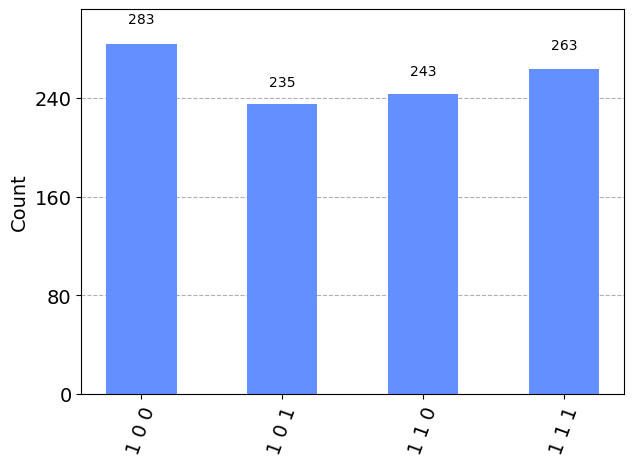

In [15]:
# We can plot a histogram to see the values
from qiskit.visualization import plot_histogram
counts = result.get_counts(circuit)
plot_histogram(counts)


In [16]:
# Let us see the counts
print(counts)


{'1 1 1': 263, '1 0 0': 283, '1 1 0': 243, '1 0 1': 235}


### IBMQ

In [ ]:
#IBMQ

# Now let us see the working of this circuit on a real quantum machine.
# Note: You need to create an IBMQ account before proceeding.
from qiskit import *
from qiskit import IBMQ

# This step is for first time users.
# 'IBMQ.save_account(TOKEN)'
# For this token, visit https://quantum-computing.ibm.com/ create an account with any email id
# and login to view the token and copy it.

# This step is after you have created and saved your account.
IBMQ.load_account()

# To view all the poviders
print([backend.name() for backend in IBMQ.providers()[0].backends()])




# We can select any provider, but ibmq_manila will work.
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub = 'ibm-q',group = 'open',project='main')
backend = provider.get_backend('ibmq_lima')
job = execute(circuit, backend=backend, shots=100)
job_monitor(job)
results = job.result()






In [ ]:
# Plot histogram of the outputs recieved.
counts = results.get_counts(circuit)
plot_histogram(counts)